In [21]:
import pandas as pd
data = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/research/MCarloLongRuns/data/data.csv")
print(data)
import matplotlib.pyplot as plt
import seaborn as sns
print(data['H'])

      Unnamed: 0    F      H  WShare_NT  WShare_VI  WShare_TF  SharpeNT  \
0              0  0.0    2.0  47.260284  47.258657   5.481058 -0.170600   
1              1  0.0    2.0  38.548588  38.636603  22.814809  0.055373   
2              2  0.0    2.0  22.465951  22.482787  55.051262  0.013669   
3              3  0.0    2.0  48.318572  48.339076   3.342352  0.011435   
4              4  0.0    2.0  30.832529  31.028812  38.138659  0.031024   
...          ...  ...    ...        ...        ...        ...       ...   
3250        3250  3.0  735.0  27.845454  44.483292  27.671254  0.969949   
3251        3251  3.0  735.0  33.194165  38.227425  28.578410  0.990677   
3252        3252  3.0  735.0  22.741123  47.090083  30.168794  0.655939   
3253        3253  3.0  735.0  39.585637  34.929940  25.484423  0.792152   
3254        3254  3.0  735.0  27.165862  47.421131  25.413006  0.671589   

      SharpeVI  SharpeTF  DeltaNTVI  DeltaNTTF  DeltaVITF  AvgSignificance  \
0     0.010069  0.024

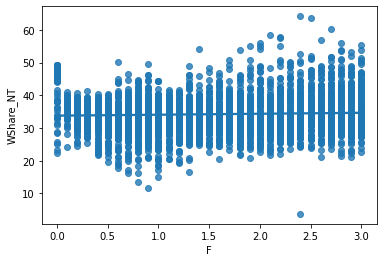

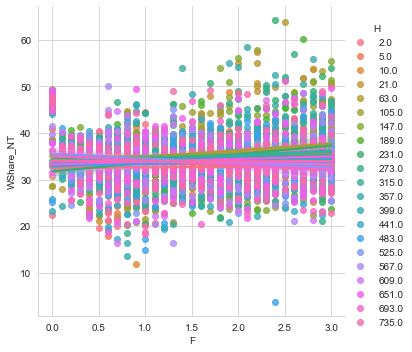

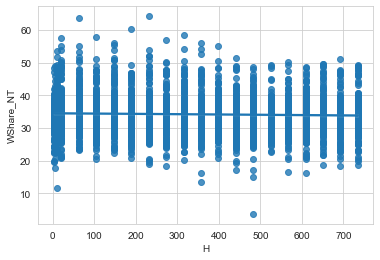

In [2]:
sns.regplot(x='F', y='WShare_NT', data=data)
plt.show()

sns.set_style('whitegrid')
sns.lmplot(x ='F', y ='WShare_NT', data = data, 
           hue ='H',)
plt.show()

sns.regplot(x='H', y='WShare_NT', data=data)
plt.show()

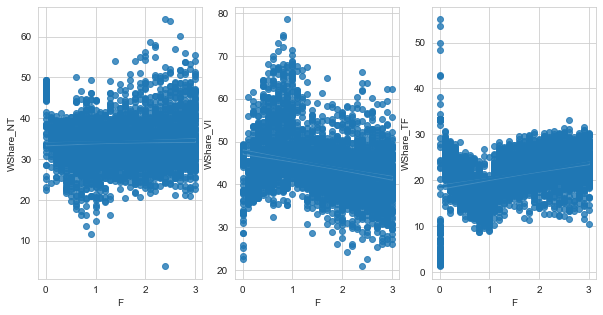

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,5), sharex = True)
sns.regplot(x='F', y='WShare_NT', data=data, ax=ax1)
sns.regplot(x='F', y='WShare_VI', data=data, ax=ax2)
sns.regplot(x='F', y='WShare_TF', data=data, ax=ax3)
plt.show()

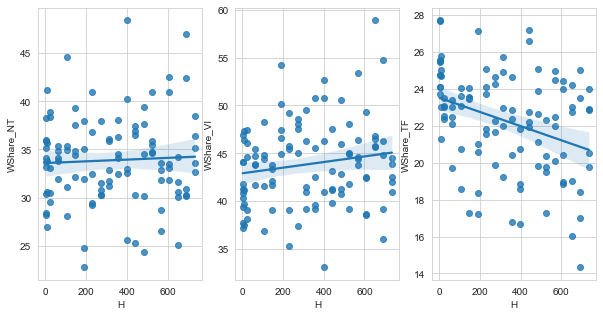

In [4]:
''' to select rows based on values of a single column '''
data2 = data.loc[data['F'] == 1.5]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,5), sharex = True)
sns.regplot(x='H', y='WShare_NT', data=data2, ax=ax1)
sns.regplot(x='H', y='WShare_VI', data=data2, ax=ax2)
sns.regplot(x='H', y='WShare_TF', data=data2, ax=ax3)
plt.show()

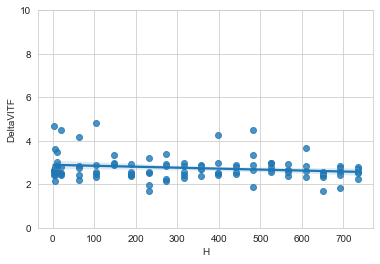

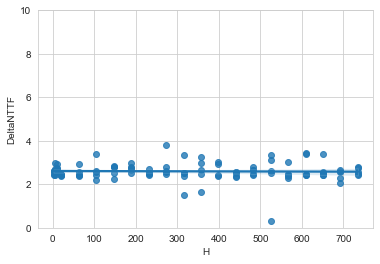

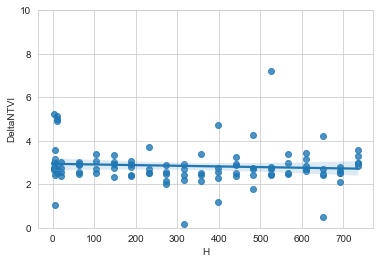

/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_96458/1676074021.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['SumDelta'] = (data3['DeltaVITF'] + data3['DeltaNTTF'] + data3['DeltaNTVI']) / 3


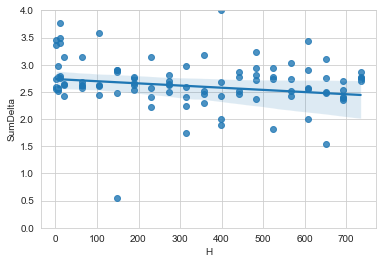

In [18]:
data2 = data.loc[data['F'] == 1.5]
data3 = data2.loc[(data2['DeltaVITF'] > 0) & (data2['DeltaVITF'] < 10)]

sns.regplot(x='H', y='DeltaVITF', data=data3)
plt.ylim(0,10)
plt.show()


data3 = data2.loc[(data2['DeltaNTTF'] > 0) & (data2['DeltaNTTF'] < 10)]

sns.regplot(x='H', y='DeltaNTTF', data=data3)
plt.ylim(0,10)
plt.show()

data3 = data2.loc[(data2['DeltaNTVI'] > 0) & (data2['DeltaNTVI'] < 10)]

sns.regplot(x='H', y='DeltaNTVI', data=data3)
plt.ylim(0,10)
plt.show()

data3['SumDelta'] = (data3['DeltaVITF'] + data3['DeltaNTTF'] + data3['DeltaNTVI']) / 3

sns.regplot(x='H', y='SumDelta', data=data3)
plt.ylim(0,4)
plt.show()

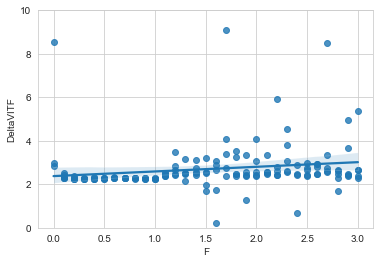

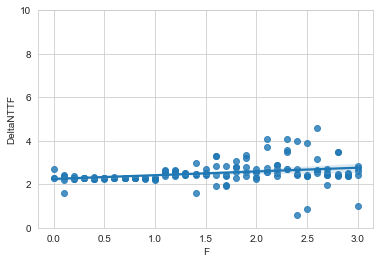

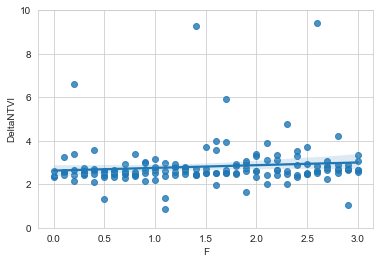

/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_96458/4046493051.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['SumDelta'] = (data3['DeltaVITF'] + data3['DeltaNTTF'] + data3['DeltaNTVI']) / 3


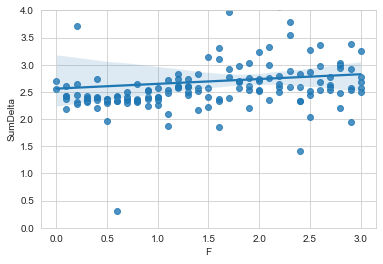

In [22]:
data2 = data.loc[data['H'] == 231]
data3 = data2.loc[(data2['DeltaVITF'] > 0) & (data2['DeltaVITF'] < 10)]

sns.regplot(x='F', y='DeltaVITF', data=data3)
plt.ylim(0,10)
plt.show()


data3 = data2.loc[(data2['DeltaNTTF'] > 0) & (data2['DeltaNTTF'] < 10)]

sns.regplot(x='F', y='DeltaNTTF', data=data3)
plt.ylim(0,10)
plt.show()

data3 = data2.loc[(data2['DeltaNTVI'] > 0) & (data2['DeltaNTVI'] < 10)]

sns.regplot(x='F', y='DeltaNTVI', data=data3)
plt.ylim(0,10)
plt.show()

data3['SumDelta'] = (data3['DeltaVITF'] + data3['DeltaNTTF'] + data3['DeltaNTVI']) / 3

sns.regplot(x='F', y='SumDelta', data=data3)
plt.ylim(0,4)
plt.show()